# French Semantic Textual Similarity

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
language = "French"
train = pd.read_csv("train.csv", sep="\t")
test = pd.read_csv("test.csv", sep="\t")

Let's see what are the rows in train and test datasets

In [4]:
train[:10]

,id,sentence_1,sentence_2,similarity
0,1,- En l'absence d'amélioration comme en cas de ...,En l'absence d'amélioration comme en cas de pe...,3.7
1,2,- En l'absence d'amélioration comme en cas de ...,En l'absence d'amélioration comme en cas de pe...,4.8
2,3,"- En outre, la patiente sera avertie de la néc...","En cas de saignement vaginal anormal, il impor...",4.3
3,4,- L'administration d'huile de paraffine chez l...,- L'administration d'huile de paraffine chez l...,4.3
4,5,- Ne pas utiliser chez les personnes présentan...,- Ne pas utiliser chez les personnes présentan...,4.3
5,6,- Refermez le flacon immédiatement après utili...,Refermez l'embout du flacon avec le bouchon im...,4.2
6,7,"« Autant que possible, on choisit des biberons...","En effet, l'utilisation des biberons en bois, ...",2.7
7,8,« On appelle ainsi des vases pouvant contenir ...,"Un biberon (une bouteille, en Suisse), est un ...",0.8
8,9,1) Traitement curatif de l'ostéodystrophie rén...,- Le traitement curatif de l'ostéodystrophie r...,4.2
9,10,A conserver à l'abri de l'humidité.,Ce médicament doit être conservé à l'abri de l...,4.3


In [5]:
train.describe()

,id,similarity
count,600.000000,600.000000
mean,300.500000,2.153833
std,173.349358,1.618781
min,1.000000,0.000000
25%,150.750000,0.600000
50%,300.500000,2.200000
75%,450.250000,3.600000
max,600.000000,5.000000


In [6]:
test[:10]

,id,sentence_1,sentence_2,similarity
0,1,- Chez les patients présentant une absence com...,- Si vous savez que vous n'avez aucune activit...,3.8
1,2,- Eviter le contact de l'embout avec l'œil ou ...,Evitez le contact de l'embout du flacon avec l...,4.7
2,3,- L'utilisation prolongée de l'huile de paraff...,- L'utilisation prolongée de l'huile de paraff...,3.4
3,4,- Ne pas dépasser la posologie recommandée.,Ne dépassez pas la posologie recommandée.,4.9
4,5,- Refermez le flacon immédiatement après utili...,Refermez soigneusement le flacon après utilisa...,4.4
5,6,- Se laver soigneusement les mains avant de pr...,Lavez-vous soigneusement les mains avant de pr...,4.8
6,7,- Tous les patients doivent poursuivre leur ré...,Tous les patients doivent poursuivre le régime...,5.0
7,8,« Simple croisement de pistes dans un désert a...,Bir Hakeim est un petit point d'eau (Bir signi...,0.5
8,9,"À 13 h, 130 avions germano-italiens bombardent...","Dans des conditions difficiles, les Français r...",0.2
9,10,"À cette époque, les gardiens de but ne portaie...","Le 1er novembre 1959 Jacques Plante, devient l...",1.3


In [7]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

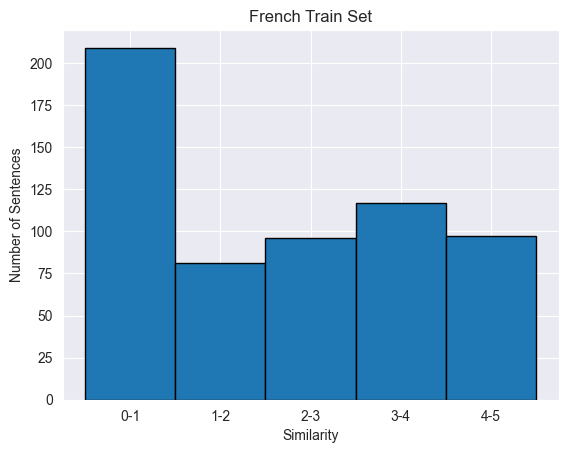

In [8]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

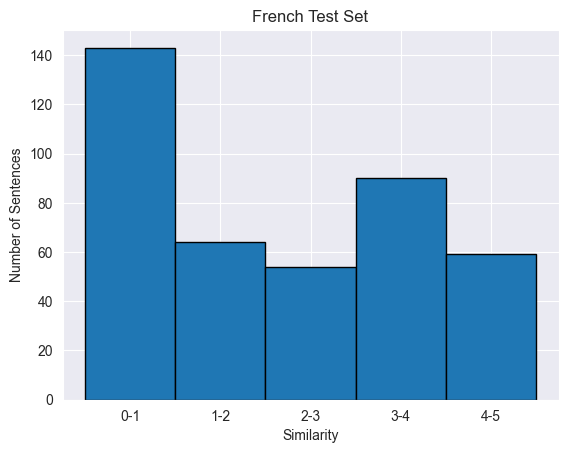

In [9]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [10]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [11]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

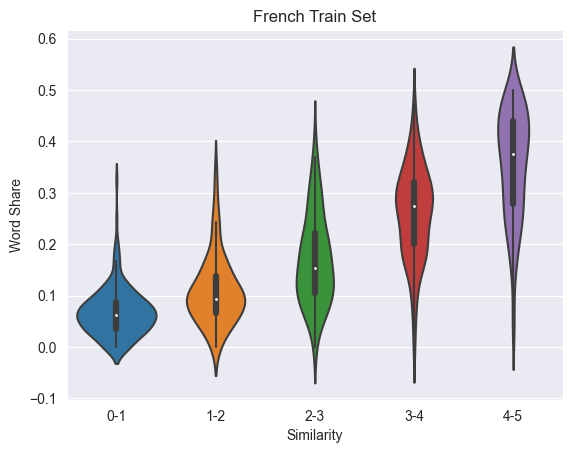

In [12]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

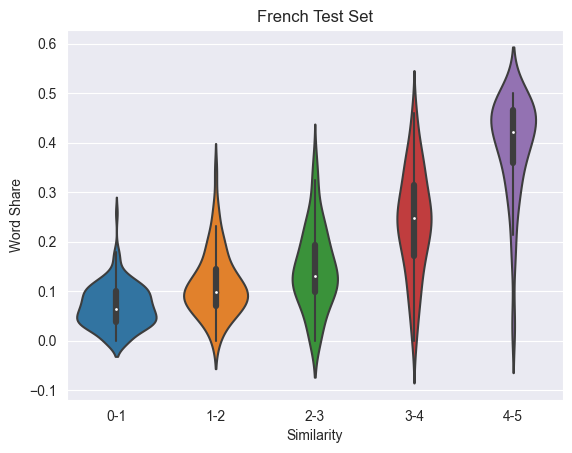

In [13]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [14]:
train[:10]

,id,sentence_1,sentence_2,similarity,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,1,- En l'absence d'amélioration comme en cas de ...,En l'absence d'amélioration comme en cas de pe...,3.7,3-4,1,1,97,127,15,20,11.0,31,0.354839,2,0
1,2,- En l'absence d'amélioration comme en cas de ...,En l'absence d'amélioration comme en cas de pe...,4.8,4-5,1,1,97,94,15,14,12.0,27,0.444444,2,0
2,3,"- En outre, la patiente sera avertie de la néc...","En cas de saignement vaginal anormal, il impor...",4.3,4-5,1,1,118,89,18,15,4.0,31,0.129032,2,0
3,4,- L'administration d'huile de paraffine chez l...,- L'administration d'huile de paraffine chez l...,4.3,4-5,1,1,231,226,32,36,15.0,61,0.245902,2,0
4,5,- Ne pas utiliser chez les personnes présentan...,- Ne pas utiliser chez les personnes présentan...,4.3,4-5,1,1,150,171,22,26,18.0,47,0.382979,2,0
5,6,- Refermez le flacon immédiatement après utili...,Refermez l'embout du flacon avec le bouchon im...,4.2,4-5,1,1,53,76,7,10,6.0,17,0.352941,2,0
6,7,"« Autant que possible, on choisit des biberons...","En effet, l'utilisation des biberons en bois, ...",2.7,2-3,1,1,222,145,38,23,7.0,51,0.137255,2,0
7,8,« On appelle ainsi des vases pouvant contenir ...,"Un biberon (une bouteille, en Suisse), est un ...",0.8,0-1,1,1,190,145,31,23,1.0,49,0.020408,2,0
8,9,1) Traitement curatif de l'ostéodystrophie rén...,- Le traitement curatif de l'ostéodystrophie r...,4.2,4-5,1,1,164,167,25,25,11.0,45,0.244444,2,0
9,10,A conserver à l'abri de l'humidité.,Ce médicament doit être conservé à l'abri de l...,4.3,4-5,1,1,35,56,6,9,4.0,15,0.266667,2,0


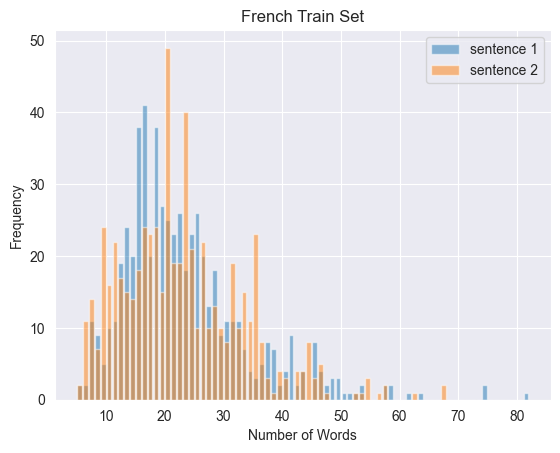

In [15]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

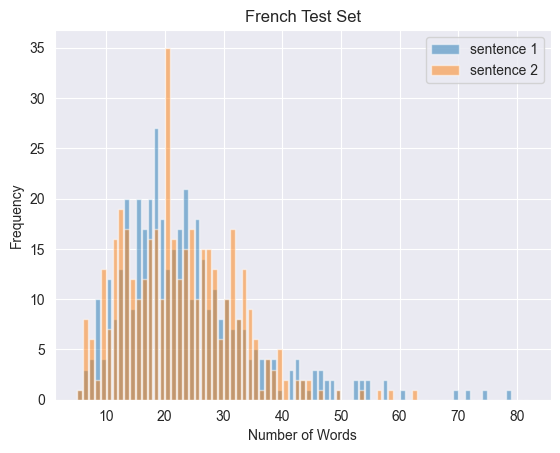

In [16]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [17]:
train.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,600.000000,600.000000,600.0,600.0,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.0,600.0
mean,300.500000,2.153833,1.0,1.0,147.046667,142.176667,22.830000,22.408333,7.223333,40.623333,0.173789,2.0,0.0
std,173.349358,1.618781,0.0,0.0,68.236487,70.203749,10.888006,10.572822,6.392566,14.633467,0.131060,0.0,0.0
min,1.000000,0.000000,1.0,1.0,31.000000,21.000000,5.000000,5.000000,0.000000,13.000000,0.000000,2.0,0.0
25%,150.750000,0.600000,1.0,1.0,99.000000,90.000000,15.000000,15.000000,2.000000,30.000000,0.066667,2.0,0.0
50%,300.500000,2.200000,1.0,1.0,131.500000,132.500000,20.000000,21.000000,5.000000,38.000000,0.131363,2.0,0.0
75%,450.250000,3.600000,1.0,1.0,179.000000,182.000000,27.000000,29.000000,10.000000,49.000000,0.275216,2.0,0.0
max,600.000000,5.000000,1.0,1.0,466.000000,457.000000,81.000000,67.000000,31.000000,101.000000,0.500000,2.0,0.0


In [18]:
test.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,410.000000,410.000000,410.0,410.0,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0,410.0
mean,205.500000,2.154878,1.0,1.0,148.095122,139.804878,23.026829,22.000000,7.048780,40.497561,0.169805,2.0,0.0
std,118.501055,1.607558,0.0,0.0,70.868336,62.011955,11.345508,9.418288,6.453714,13.674571,0.135674,0.0,0.0
min,1.000000,0.000000,1.0,1.0,31.000000,26.000000,5.000000,5.000000,0.000000,13.000000,0.000000,2.0,0.0
25%,103.250000,0.500000,1.0,1.0,99.250000,96.250000,15.000000,15.000000,2.000000,30.250000,0.066667,2.0,0.0
50%,205.500000,2.000000,1.0,1.0,134.000000,134.000000,21.000000,21.000000,5.000000,40.000000,0.118347,2.0,0.0
75%,307.750000,3.600000,1.0,1.0,185.000000,178.000000,28.000000,28.000000,10.000000,48.000000,0.254360,2.0,0.0
max,410.000000,5.000000,1.0,1.0,485.000000,457.000000,78.000000,62.000000,45.000000,97.000000,0.500000,2.0,0.0
